<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전력사용량 예측 AI 경진대회 - 데이콘

[https://dacon.io/competitions/official/235736/codeshare]

1. 주제
전력 수요 예측 시뮬레이션을 통한 효율적인 인공지능 알고리즘 발굴
전력 융합 신서비스 발굴 및 비즈니스 모델 개발 활용
디지털 뉴딜의 성공을 위한 인공지능(AI)의 융합, 확산을 촉진


2. 대회 설명
건물 정보와 기후 정보를 활용한 전력사용량 에측 


3. 주최 / 주관
주최 : 한국에너지공단
주관 : DACON


4. 참가 대상
AI 혹은 빅데이터에 관심 있는 누구나
학교, 기업, 교육 업체 등 단체에서 자유롭게 참가 가능

[데이터]

train.csv :		 
train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
1시간 단위로 제공
전력사용량(kWh) 포함
train.shape: (122400, 10)


test.csv : 
test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
전력사용량(kWh) 미포함
test.shape: (10080, 9)


sample_submission.csv : 
sample_submission 데이터 
sample_submission.shape: (10080, 2)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import platform
import os
import json

In [3]:
from matplotlib import font_manager, rc
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False;

## 데이터 로드

In [24]:
train = pd.read_csv('train.csv', encoding='cp949', header=0)
test = pd.read_csv('test.csv', encoding='cp949',  header=0)
sub = pd.read_csv( 'sample_submission.csv', encoding='cp949')

In [25]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [27]:
train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


In [ ]:
train.isnull().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         1
강수량(mm)       1
일조(hr)        1
비전기냉방설비운영     1
태양광보유         1
dtype: int64

In [ ]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [ ]:
test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0


In [ ]:
test.isnull().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
dtype: int64

test가 너무 Null값이 많다.. 이걸 어케 처리하지..

## 데이터 전처리


In [10]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [32]:
train['date_time']=pd.to_datetime(train['date_time'])

In [33]:
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['hour'] = train['date_time'].dt.hour
train['weekday']=train['date_time'].dt.weekday
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour,weekday
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,0


weekday에서 0부터 일요일 6까지 토요일.

In [13]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour,weekday
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,0


In [34]:
test['date_time']=pd.to_datetime(test['date_time'])

In [35]:

test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour
test['weekday']=test['date_time'].dt.weekday
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,month,day,hour,weekday
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN,8,25,0,1
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,1,1
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,2,1
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN,8,25,3,1
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,25,4,1


In [16]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'month', 'day', 'hour',
       'weekday'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

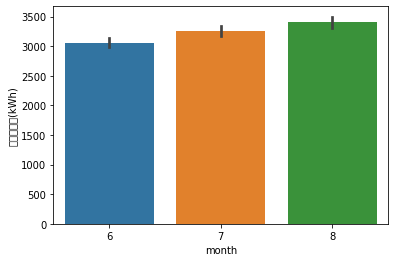

In [17]:
sns.barplot(data=train,x='month',y='전력사용량(kWh)')

 8월에 전력사용량이 가장 많은 것을 볼 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

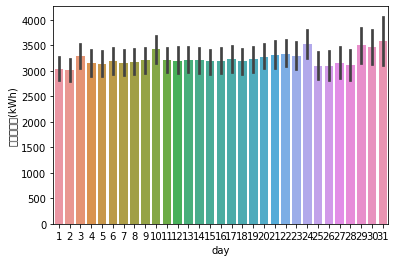

In [18]:
sns.barplot(data=train,x='day',y='전력사용량(kWh)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

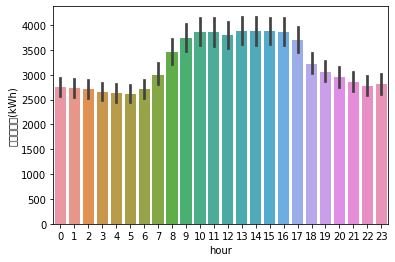

In [19]:
sns.barplot(data=train,x='hour',y='전력사용량(kWh)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

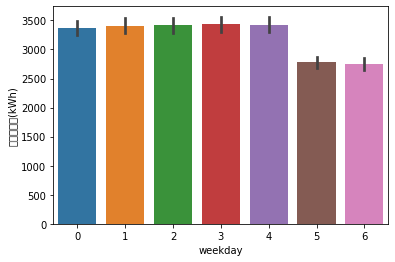

In [20]:
sns.barplot(data=train,x='weekday',y='전력사용량(kWh)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

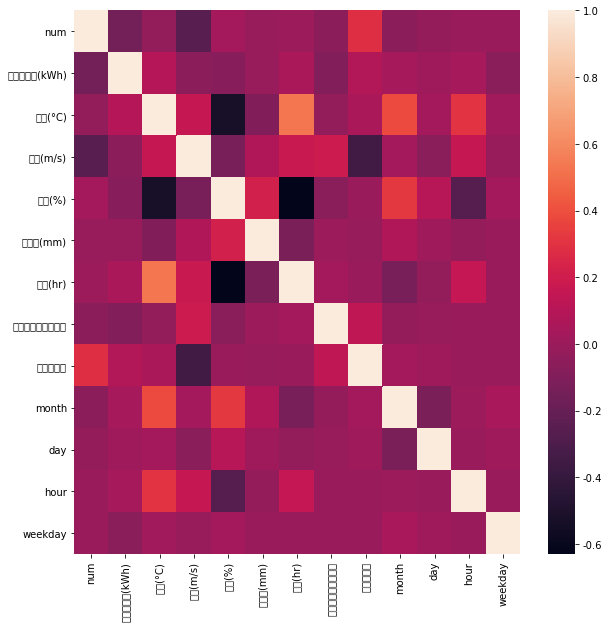

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr())

In [28]:
train['num'].value_counts()

60    2040
59    2040
28    2040
27    2040
26    2040
25    2040
24    2040
23    2040
22    2040
21    2040
20    2040
19    2040
18    2040
17    2040
16    2040
15    2040
14    2040
13    2040
12    2040
11    2040
10    2040
9     2040
8     2040
7     2040
6     2040
5     2040
4     2040
3     2040
2     2040
29    2040
30    2040
31    2040
46    2040
58    2040
57    2040
56    2040
55    2040
54    2040
53    2040
52    2040
51    2040
50    2040
49    2040
48    2040
47    2040
45    2040
32    2040
44    2040
43    2040
42    2040
41    2040
40    2040
39    2040
38    2040
37    2040
36    2040
35    2040
34    2040
33    2040
1     2040
Name: num, dtype: int64

In [29]:
train.groupby('num').mean()['전력사용량(kWh)']

num
1     8543.273488
2     1299.914365
3     3371.353699
4      763.997353
5     2714.509694
6     1184.129868
7     1527.138356
8     8837.364073
9     1256.884880
10    1427.164069
11    2391.372635
12    1748.853338
13    1089.115200
14    1770.616219
15    2198.973266
16    1660.828447
17    1019.795029
18    1797.636244
19     827.193587
20    1463.527203
21    1662.093794
22    1203.965894
23    1884.175209
24    3114.640165
25    1519.179927
26    2987.688676
27     666.142241
28    2264.569571
29     861.074248
30    5761.224314
31    5964.317576
32    2402.439671
33    2576.495435
34     900.586521
35    1299.956933
36    1093.786776
37    1992.514160
38    7588.679824
39    1858.357760
40    2597.993842
41    1255.038925
42    3624.592027
43    1838.532282
44    2487.588618
45    1380.596589
46    1841.530091
47    2137.956044
48    1143.003467
49    1168.672804
50    1065.012348
51    1705.039200
52    3779.359279
53    1423.925921
54    6839.836376
55    2088.306878
56    

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

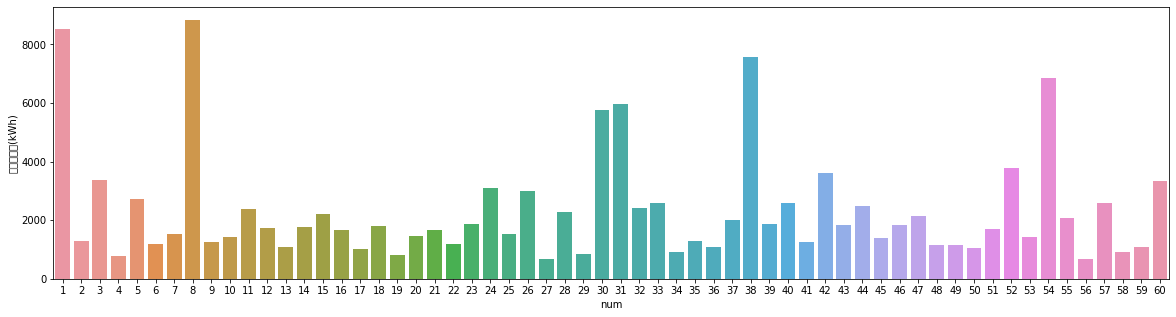

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(x=train.groupby('num').mean()['전력사용량(kWh)'].index,y=train.groupby('num').mean()['전력사용량(kWh)'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

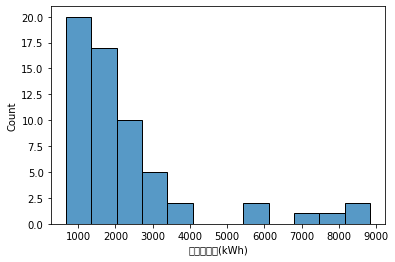

In [ ]:
sns.histplot(train.groupby('num')['전력사용량(kWh)'].mean())

In [ ]:
train.groupby(['비전기냉방설비운영','태양광보유'])['전력사용량(kWh)'].mean()

비전기냉방설비운영  태양광보유
0.0        0.0      2077.030506
           1.0      1582.298192
1.0        0.0      2101.993590
           1.0      2949.726621
Name: 전력사용량(kWh), dtype: float64

비전기 냉방설비 운영여부, 태양광 보유 여부가 건물의 전력 사용량을 낮춰주진 않음.

### 건물별 전력 사용량과 다른 변수들의 상관관계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

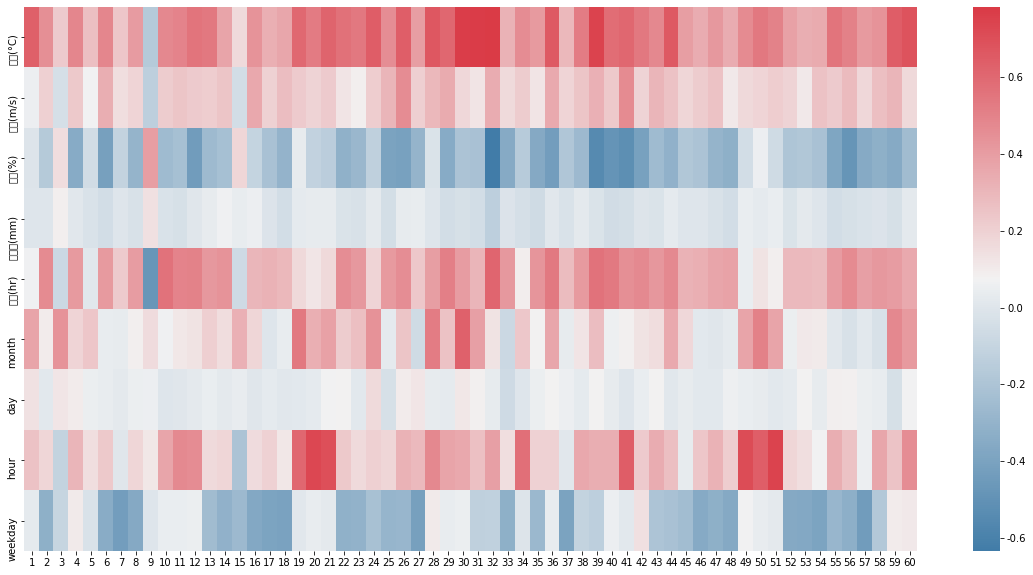

In [ ]:
corr=[]
for num in range(1,61):
  df=train[train.num==num]
  num_corr=df.corr()['전력사용량(kWh)']
  num_corr=num_corr.drop(['num','비전기냉방설비운영','태양광보유','전력사용량(kWh)'])
  corr.append(num_corr)

corr_df=pd.concat(corr,axis=1).T
corr_df.index=list(range(1,61))

f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr_df.T,cmap=sns.diverging_palette(240,10,as_cmap=True),ax=ax)
plt.show()

###  각 건물의 시간에 따른 평균 전력 사용량 시각화


In [ ]:
train.groupby('hour')['전력사용량(kWh)'].mean()

hour
0     1846.469340
1     1797.227145
2     1763.945449
3     1731.496235
4     1723.405929
5     1774.481706
6     1892.440397
7     2111.672173
8     2376.449926
9     2628.933381
10    2831.117224
11    2867.078474
12    2859.638430
13    2894.035072
14    2907.757971
15    2905.856958
16    2894.292194
17    2800.367734
18    2571.695382
19    2441.129058
20    2274.760480
21    2065.512323
22    1924.787144
23    1911.390654
Name: 전력사용량(kWh), dtype: float64

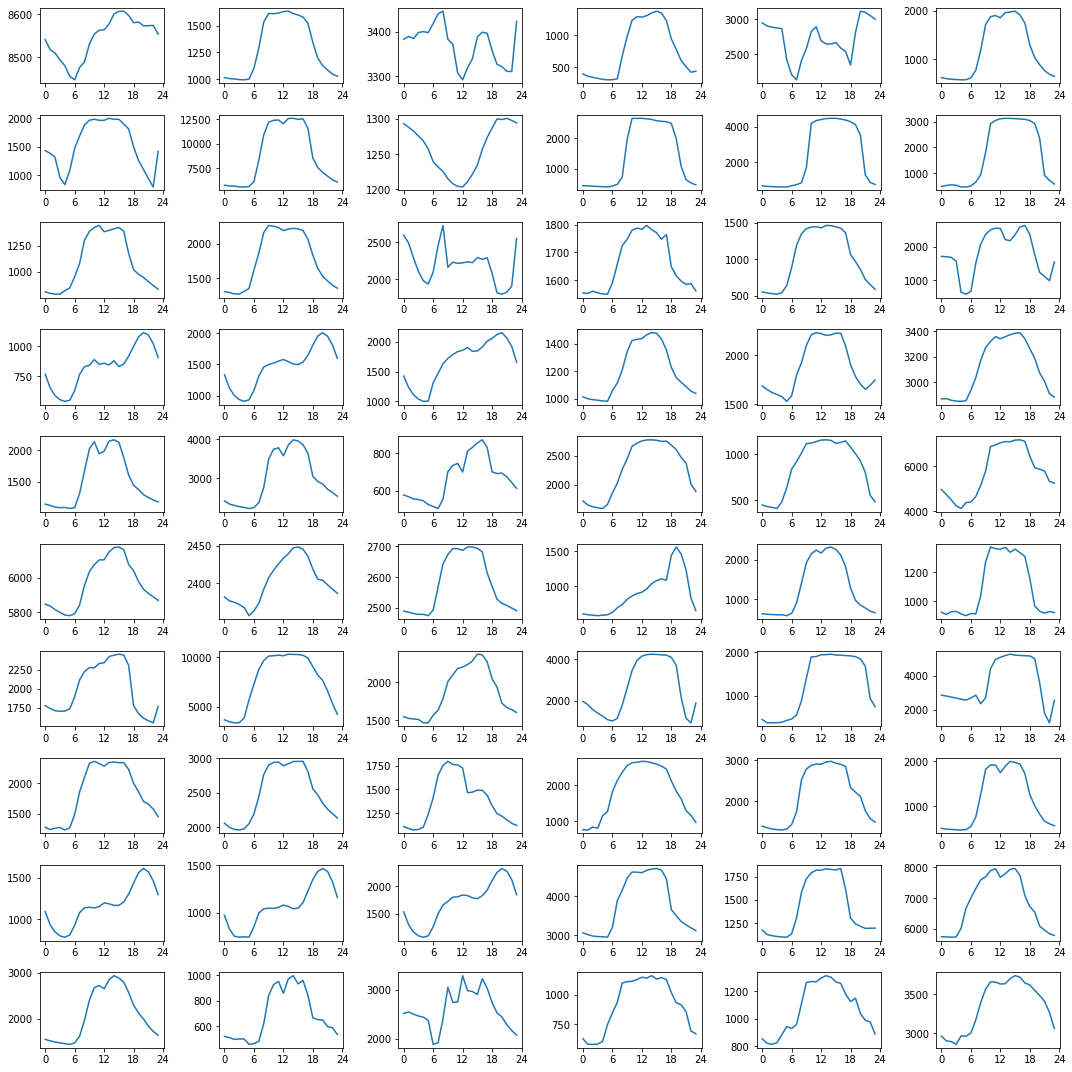

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.axis('off')

for num in range(1,61):
  df=train[train.num==num]
  ax=fig.add_subplot(10,6,num)
  ax.plot(df['hour'].unique(),df.groupby('hour')['전력사용량(kWh)'].mean())
  ax.set_xticks([0,6,12,18,24])

plt.tight_layout()
plt.show()

대부분 종모양의 그래프였으나 어떤 건물은 그 반대였다. 주로 밤에 운영하는 곳이겠지. 

## 요일별 평균 전력 사용량

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

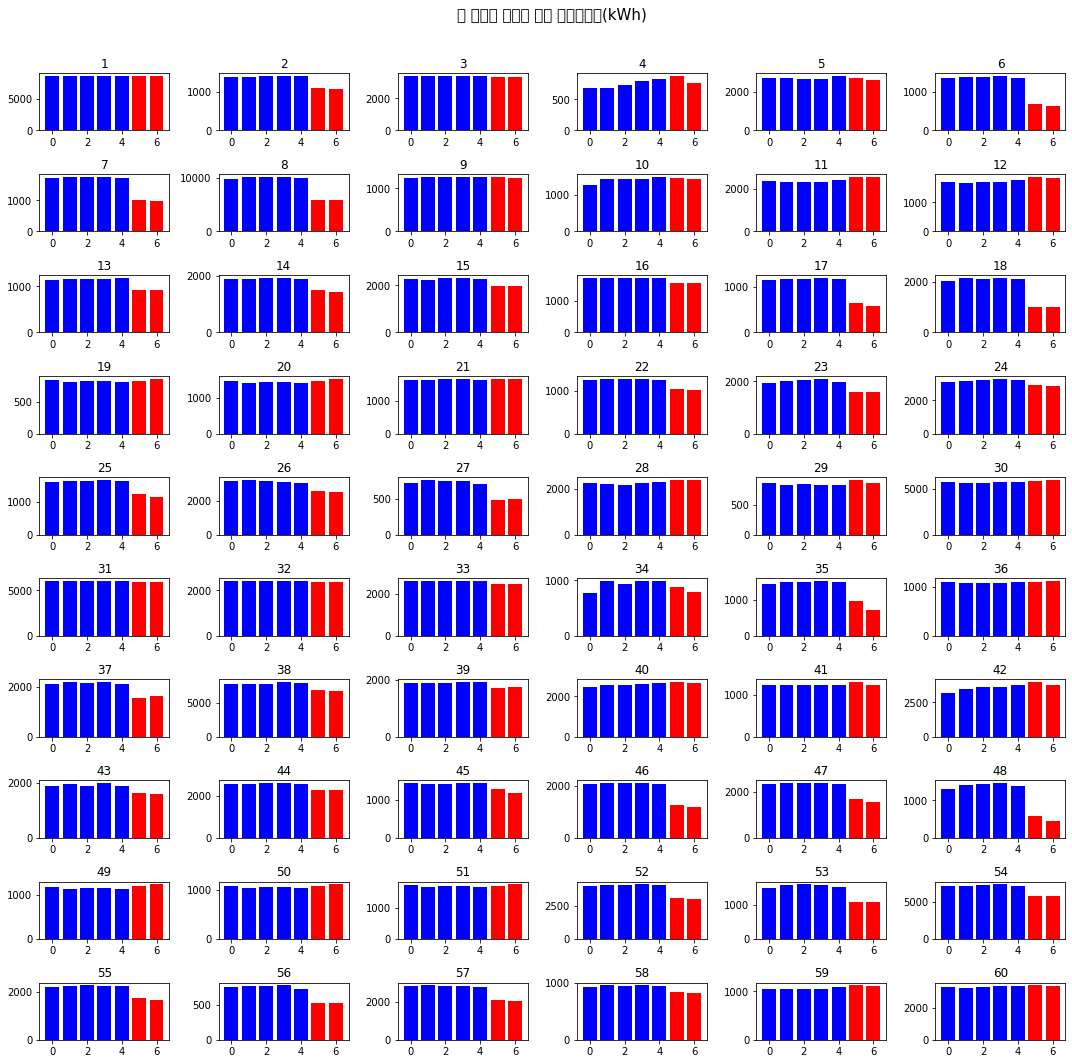

In [37]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 요일별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

weekday = [0,1,2,3,4,5,6]
colors = ['blue','blue','blue','blue','blue','red','red']

for num in range(1,61):
    df = train[train.num==num]
    df_counts = df.groupby('weekday')['전력사용량(kWh)'].mean()
    df_counts = df_counts.reindex(weekday)
    ax = fig.add_subplot(10,6,num)
    ax.bar(df['weekday'].unique(), df_counts, color=colors)
    ax.set_title(f'{num}')

plt.tight_layout()
plt.show()

어떤 건물은 모든 요일의 전력 사용량이 비슷, 어떤 건물들은 주말에 전력 사용량이 적었다. 주로 회사, 학원인 경우 주말에 전력 사용량이 적겠지? 

## 데이터 전처리

test의 결측치를 train에 있는 데이터로 채워준다. 같은 건물이면 비전기냉방설비운영과 태양광 보유는 정해져있기 떄문

In [ ]:
#건물변로 '비전기냉방설비운영'과 '태양광보유'를 판단해 test set의 결측치를 보간해준다.
train[['num','비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0

for i in range(0,len(train),len(train)//60):
  count+=1
  ice[count]=train.loc[i,'비전기냉방설비운영']
  hot[count]=train.loc[i,'태양광보유']

In [ ]:
for i in range(len(test)):
  test.loc[i,'비전기냉방설비운영']=ice[test['num'][i]]
  test.loc[i,'태양광보유']=hot[test['num'][i]]

## LGBM 모델링

In [ ]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,hour,weekday
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,1,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,2,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,3,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,4,0


In [ ]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,month,day,hour,weekday
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,8,25,0,1
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8,25,1,1
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8,25,2,1
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,0.0,0.0,8,25,3,1
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8,25,4,1


In [ ]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'month', 'day', 'hour',
       'weekday'],
      dtype='object')

In [ ]:
train_x=train.drop('전력사용량(kWh)',axis=1)
train_y=train[['전력사용량(kWh)']]

In [ ]:
train_x.drop('date_time',axis=1,inplace=True)
test.drop('date_time',axis=1,inplace=True)

KeyError: ignored

In [ ]:
from sklearn.model_selection import KFold

cross=KFold(n_splits=5,shuffle=True,random_state=42)
folds=[]
for train_idx,valid_idx in cross.split(train_x,train_y):
  folds.append((train_idx,valid_idx))

In [ ]:
from lightgbm import LGBMRegressor
models={}
for fold in range(5):
  print(f'=============={fold+1}====================')
  train_idx,valid_idx=folds[fold]
  X_train=train_x.iloc[train_idx,:]
  y_train=train_y.iloc[train_idx,:]
  X_valid=train_x.iloc[valid_idx,:]
  y_valid=train_y.iloc[valid_idx,:]

  model=LGBMRegressor(n_estimators=100)
  model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid,y_valid)],
            early_stopping_rounds=30,verbose=100)
  models[fold]=model

  print(f'==============================================\n\n')

==============1====================
Training until validation scores don't improve for 30 rounds.
[100]	training's l2: 94925.8	valid_1's l2: 95273.5
Did not meet early stopping. Best iteration is:
[100]	training's l2: 94925.8	valid_1's l2: 95273.5


==============2====================
Training until validation scores don't improve for 30 rounds.
[100]	training's l2: 95884.7	valid_1's l2: 106225
Did not meet early stopping. Best iteration is:
[100]	training's l2: 95884.7	valid_1's l2: 106225


==============3====================
Training until validation scores don't improve for 30 rounds.
[100]	training's l2: 92924.2	valid_1's l2: 93493.7
Did not meet early stopping. Best iteration is:
[100]	training's l2: 92924.2	valid_1's l2: 93493.7


==============4====================
Training until validation scores don't improve for 30 rounds.
[100]	training's l2: 95849.4	valid_1's l2: 99225.3
Did not meet early stopping. Best iteration is:
[100]	training's l2: 95849.4	valid_1's l2: 99225.3


==

In [ ]:
for i in range(5):
  sub['answer']+=models[i].predict(test)/5

## 느낀점

다른 분석들을 보니 대회 기준에 맞춰 시계열 분석을 많이 이용.. 시계열 분석에 많이 쓰이는 XGBoost로 분석한 팀도 많았으나, 건물의 특성을 군집화하여 성능을 끌어올린 분석도 많았음. 전력 사용량의 집중 요일, 시간에 따라 건물들을 군집화해 분석을 한 것들을 보면서 재미를 느꼈던 것 같다. 

그러나......

다른 분석들을 보면서 공부도 했지만 내 실력의 초라함을 더 많이 느꼈다... ㅠㅜㅠㅜ 분석하고 싶어도 패키지의 사용법을 모르거나, 공부가 부족해서 분석을 할 수가 없었다. 내 나름대로 시각화라도 해보려고 노력해보았다.

공부해야할 것
- 시계열 분석
- 군집화
